In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

In [2]:
import seaborn as sns

1.Take the PoliceKillingUS Dataset.

In [3]:
data=pd.read_csv('D:\datas\PoliceKillingsUS.csv',encoding='latin1')

In [4]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
data.shape

(2535, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


2. Perform DataCleaning using SimpleImputer, LogisticRegression techniques

In [7]:
data['date']=pd.to_datetime(data['date'])

In [8]:
cat_cols=[]
for col in data.select_dtypes('object'):
    if col!='name':
        data[col]=data[col].astype('category')
        cat_cols.append(col)

In [9]:
cat_cols

['manner_of_death',
 'armed',
 'gender',
 'race',
 'city',
 'state',
 'threat_level',
 'flee']

In [10]:
data.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [11]:
SI_cat=SimpleImputer(missing_values=np.nan, strategy='most_frequent', copy=False)

In [12]:
for col in cat_cols:
    if data[col].isnull().sum()!=0:
        data[col]=SI_cat.fit_transform(data[[col]])

In [13]:
SI_num=SimpleImputer(missing_values=np.nan, strategy='median', copy=False)

In [14]:
data['age']=SI_num.fit_transform(data[['age']])

3.a)Top 10 cities which have most number of fatal shootings

In [15]:
data['city'].value_counts().nlargest(10)

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

3.b)Age group of people killed along with reasons why were they killed and how were they killed

In [16]:
np.cumsum(data['armed'].value_counts().nlargest(15))

gun               1407
knife             1780
vehicle           1957
unarmed           2128
undetermined      2245
toy weapon        2349
machete           2367
unknown weapon    2385
Taser             2394
ax                2403
sword             2411
baseball bat      2419
metal pipe        2426
box cutter        2433
hammer            2440
Name: armed, dtype: int64

In [17]:
arms=data['armed'].value_counts()

In [18]:
value=arms[:6].index
print (value)

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon'], dtype='object')


In [19]:
data['armed']=data.armed.where(data.armed.isin(value),'other')

In [20]:
data['armed'].value_counts()

gun             1407
knife            373
other            186
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
Name: armed, dtype: int64

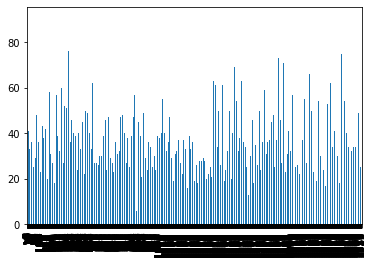

In [21]:
data['age'].plot(kind='bar')

In [22]:
data['age'].describe()

count    2535.000000
mean       36.526233
std        12.839056
min         6.000000
25%        27.000000
50%        34.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

In [23]:
bins=[0,10,18,30,40,50,100]
labels=['Child','teens','twenties','thirties', 'forties', 'old']
data['Age_group']=pd.cut(data.age, bins=bins, labels=labels)

In [24]:
data.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_group
0,3,Tim Elliot,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,old
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,forties
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,twenties
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,thirties
4,9,Michael Rodriguez,2015-04-01,shot,other,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,thirties
5,11,Kenneth Joe Brown,2015-04-01,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,teens
6,13,Kenneth Arnold Buck,2015-05-01,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,twenties
7,15,Brock Nichols,2015-06-01,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,thirties
8,16,Autumn Steele,2015-06-01,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,thirties
9,17,Leslie Sapp III,2015-06-01,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,forties


In [25]:
age_shots=pd.crosstab(data['Age_group'],data['manner_of_death'])
age_shots

manner_of_death,shot,shot and Tasered
Age_group,,
Child,1,0
teens,97,7
twenties,774,48
thirties,725,57
forties,389,36
old,377,24


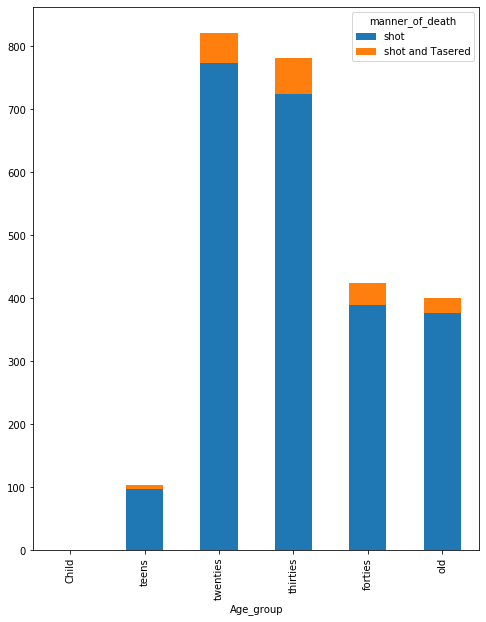

In [26]:
age_shots.plot(kind='bar', stacked=True, legend=True, figsize=(8,10))
plt.show()

3.c)Visualize geographic locations using plotly

In [27]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True)


In [28]:
map_data=dict(type='choropleth', locations=data['state'], colorscale='Reds', text=data['state'], marker=dict(line=dict(color='rgb(255,0,0)',width=2)), z=data['age'], colorbar=dict(title='age range'))

In [29]:
map_layout= dict(title='police killings in USA', geo=dict(scope='usa',showlakes=True, lakecolor='rgb(0,0,255)'))

In [30]:
map_actual=go.Figure(data=[map_data], layout=map_layout)

In [31]:
iplot(map_actual)

4.Perform Label Encoding.

In [32]:
data['state'].nunique()

51

In [33]:
n=data['state'].value_counts()

In [34]:
vals=n[:22].index
print (vals)

CategoricalIndex(['CA', 'TX', 'FL', 'AZ', 'OH', 'OK', 'CO', 'GA', 'NC', 'MO',
                  'WA', 'IL', 'TN', 'LA', 'NM', 'PA', 'AL', 'VA', 'NY', 'SC',
                  'KY', 'IN'],
                 categories=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', ...], ordered=False, dtype='category')


In [35]:
data['state']=data.state.where(data.state.isin(vals),'other')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Implicitly converting categorical to object-dtype ndarray. One or more of the values in 'other' are not present in this categorical's categories. A future version of pandas will raise a ValueError when 'other' contains different categories.

To preserve the current behavior, add the new categories to the categorical before calling 'where', or convert the categorical to a different dtype.



In [36]:
data['state'].nunique()

23

In [37]:
np.cumsum(data['city'].value_counts().nlargest(100))

Los Angeles     39
Phoenix         70
Houston         97
Chicago        122
Las Vegas      143
              ... 
Chico          835
Antioch        839
Rapid City     843
Cleveland      847
Huntsville     851
Name: city, Length: 100, dtype: int64

In [38]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_group
0,3,Tim Elliot,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,old
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.0,M,W,Aloha,other,False,attack,Not fleeing,False,forties
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,other,False,other,Not fleeing,False,twenties
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,thirties
4,9,Michael Rodriguez,2015-04-01,shot,other,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,thirties


In [39]:
data=data.drop(['id','city','date','name','age'], axis=1)

In [40]:
data.shape

(2535, 10)

In [41]:
data.dtypes

manner_of_death            category
armed                        object
gender                     category
race                         object
state                        object
signs_of_mental_illness        bool
threat_level               category
flee                         object
body_camera                    bool
Age_group                  category
dtype: object

In [42]:
for col in data.select_dtypes('object'):
    if col!='name':
        data[col]=data[col].astype('category')

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()

In [45]:
for col in data.select_dtypes(('category','bool')):
    data[col]=le.fit_transform(data[col].astype('str'))


In [46]:
data.head()

,manner_of_death,armed,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_group
0,0,0,1,0,21,1,0,2,0,2
1,0,0,1,5,22,0,0,2,0,1
2,1,4,1,2,22,0,1,2,0,5
3,0,3,1,5,2,1,0,2,0,4
4,0,2,1,2,3,0,0,2,0,4


5. In KNN, plot the optimum K and use hamming distance for calculating the distance metric. If possible, try to implement hamming distance manually.

In [47]:
y=data['manner_of_death']
x=data.drop('manner_of_death', axis=1)

In [48]:
y.shape

(2535,)

In [49]:
x.shape

(2535, 9)

In [50]:
from sklearn.model_selection import StratifiedKFold

In [51]:
folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=True)

In [52]:
for train_index, test_index in folds.split(x,y):
    x_train,x_test=x.iloc[train_index], x.iloc[test_index]
    y_train,y_test=y.iloc[train_index], y.iloc[test_index]

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
neighbors=np.arange(1,10)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

In [70]:
for i, j in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=j, metric='hamming')
    knn.fit(x_train,y_train)
    train_accuracy[i]=knn.score(x_train,y_train)
    test_accuracy[i]=knn.score(x_test,y_test)

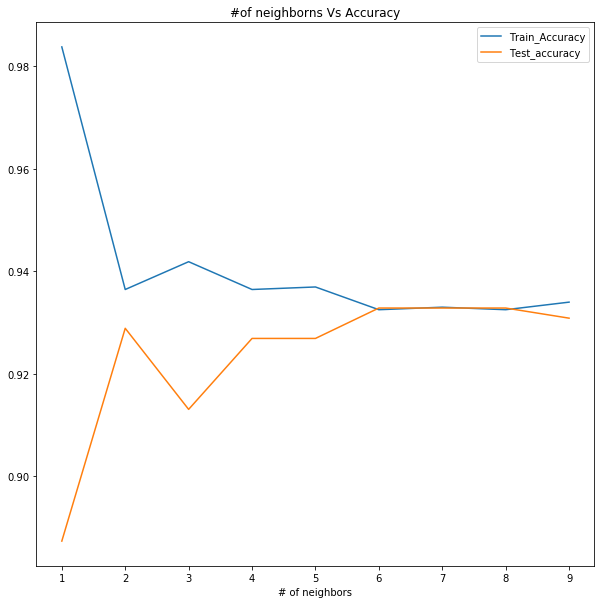

In [71]:
plt.figure(figsize=(10,10))
plt.plot(neighbors,train_accuracy, label='Train_Accuracy')
plt.plot(neighbors,test_accuracy, label='Test_accuracy')
plt.title('#of neighborns Vs Accuracy')
plt.legend()
plt.xlabel('# of neighbors')
plt.show()

k=2 is gives the max accuracy without any overfitting

In [57]:
knn=KNeighborsClassifier(n_neighbors=2)

In [58]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [59]:
knn.score(x_test,y_test)

0.9308300395256917

In [60]:
y_pred=knn.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
confusion_matrix(y_test,y_pred)

array([[470,   2],
       [ 33,   1]], dtype=int64)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       472
           1       0.33      0.03      0.05        34

    accuracy                           0.93       506
   macro avg       0.63      0.51      0.51       506
weighted avg       0.89      0.93      0.90       506



Fine-tune the parameters of KNN by using GridSearchCV.

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
params={'n_neighbors':np.arange(1,25)}

In [66]:
knn=KNeighborsClassifier()

In [67]:
knn_cv=GridSearchCV(knn, params, cv=5)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [68]:
knn_cv.best_score_

0.9319862000985707

In [69]:
knn_cv.best_params_

{'n_neighbors': 8}